In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import dataframe_image as dfi
import seaborn as sns

In [2]:
from pathlib import Path
game_sales = Path("Video_Games.csv")
game_sales_df = pd.read_csv(game_sales)
game_sales_df = df_filtered = game_sales_df[game_sales_df['Global_Sales'] >= 1]
game_sales_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Best performing platform: PS2
Global sales: 789.41

Top 5 platforms by total sales:
Platform
PS2     789.41
X360    676.47
Wii     626.79
PS3     620.62
DS      467.34
Name: Global_Sales, dtype: float64


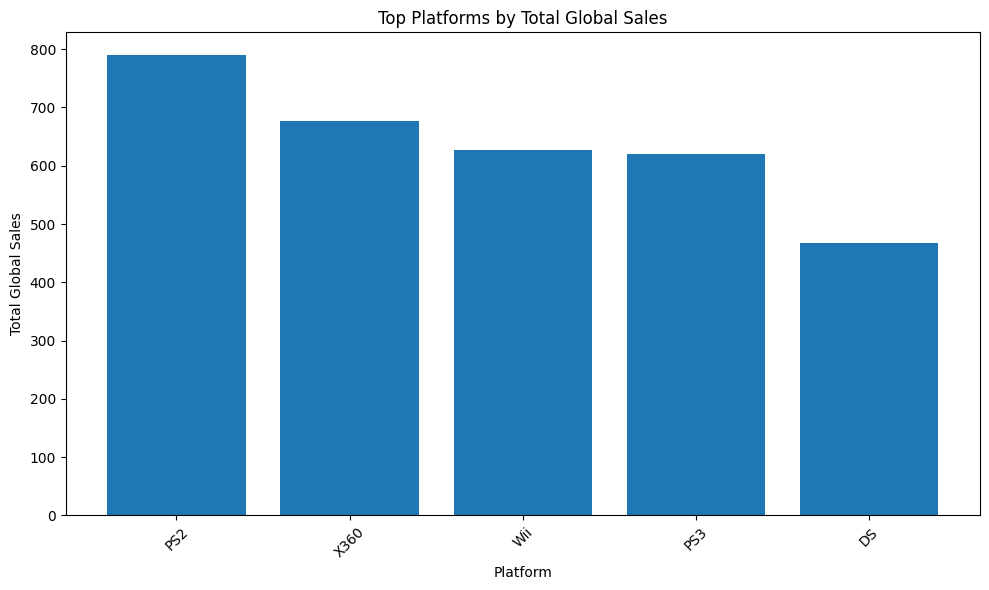

In [3]:

# Group the data by platform and calculate the total global sales for each platform
platform_sales = game_sales_df.groupby('Platform')['Global_Sales'].sum()

# Find the platform with the highest total global sales
best_platform = platform_sales.idxmax()
highest_sales = platform_sales.max()

# Get the top N platforms with the highest total sales
top_n = 5
top_platforms_by_sales = platform_sales.nlargest(top_n)

# Display the best performing platform and its total global sales
print("Best performing platform:", best_platform)
print("Global sales:", highest_sales)

# Display the top N platforms with the highest total sales
print("\nTop", top_n, "platforms by total sales:")
print(top_platforms_by_sales)

# Create a bar graph for the top N platforms with the highest total sales
plt.figure(figsize=(10, 6))
plt.bar(top_platforms_by_sales.index, top_platforms_by_sales.values)
plt.xlabel('Platform')
plt.ylabel('Total Global Sales')
plt.title('Top Platforms by Total Global Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("image/top_platform_by_total_sales.png")
plt.show()

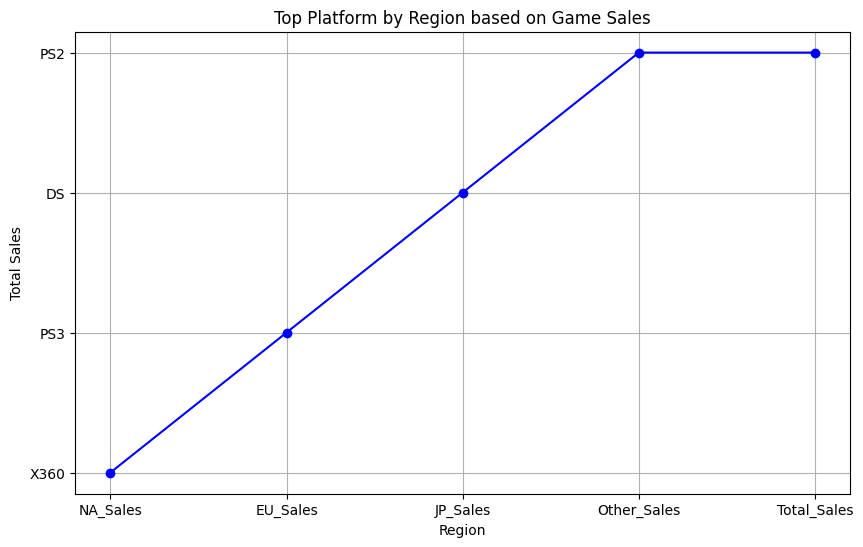

In [4]:
# Calculate the total sales for each platform in each region
game_sales_df['Total_Sales'] = game_sales_df['NA_Sales'] + game_sales_df['EU_Sales'] + game_sales_df['JP_Sales'] + game_sales_df['Other_Sales']

# Find the top platform by region based on total sales
top_platform_by_region = game_sales_df.groupby('Platform').agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Total_Sales': 'sum'
}).idxmax()

# Create a line chart to visualize the top platform by region based on game sales
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']
platforms = [top_platform_by_region[region] for region in regions]

plt.figure(figsize=(10, 6))
plt.plot(regions, platforms, marker='o', linestyle='-', color='b')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Top Platform by Region based on Game Sales')
plt.grid(True)
plt.savefig("image/top_platform_by_region_based_on_game_sales.png")
plt.show()

Best performing platforms in all regions:
   Platform  Total_Sales
0      2600        51.47
1       3DS       171.07
2        DC         8.82
3        DS       467.30
4        GB       241.03
5       GBA       159.97
6        GC        94.83
7       GEN        29.17
8       N64       142.84
9       NES       236.82
10       PC       154.72
11       PS       463.72
12      PS2       789.42
13      PS3       620.74
14      PS4       243.61
15      PSP       113.46
16      PSV         9.66
17      SAT         4.17
18      SCD         1.50
19     SNES       145.38
20      Wii       626.77
21     WiiU        51.46
22     X360       676.48
23       XB        93.65
24     XOne       114.90


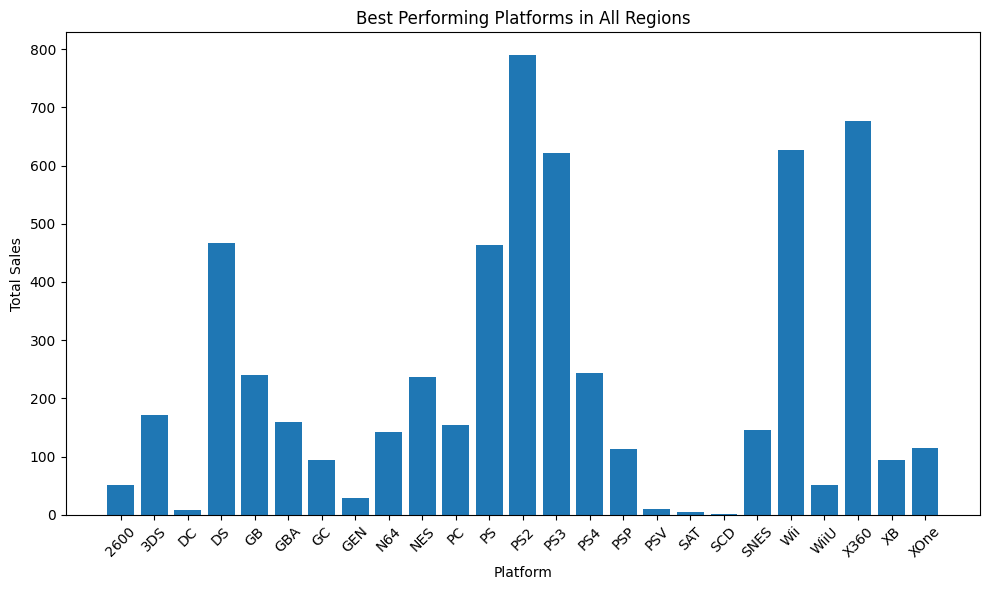

In [7]:
# Calculate the total sales for each platform by summing sales from all regions
game_sales_df['Total_Sales'] = game_sales_df['NA_Sales'] + game_sales_df['EU_Sales'] + game_sales_df['JP_Sales'] + game_sales_df['Other_Sales']

# Group the data by 'Platform' and calculate the total sales for each platform
platform_total_sales = game_sales_df.groupby('Platform')['Total_Sales'].sum()

# Find the platforms with the highest total sales
best_platforms = platform_total_sales.nlargest(5)

# Create a DataFrame for best performing platforms
best_platforms_df = platform_total_sales.reset_index(name='Total_Sales')

# Display the best performing platforms
print("Best performing platforms in all regions:")
print(best_platforms_df)

# Create a bar chart for best performing platforms
plt.figure(figsize=(10, 6))
plt.bar(best_platforms_df['Platform'], best_platforms_df['Total_Sales'])
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.title('Best Performing Platforms in All Regions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("image/best_performing_platform_in_all_regions.png")
plt.show()


    Year_of_Release Platform
0            1980.0     2600
1            1981.0     2600
2            1982.0     2600
3            1983.0      NES
4            1984.0      NES
5            1985.0      NES
6            1986.0      NES
7            1987.0      NES
8            1988.0      NES
9            1989.0       GB
10           1990.0      NES
11           1991.0     SNES
12           1992.0     SNES
13           1993.0     SNES
14           1994.0     SNES
15           1995.0       PS
16           1996.0       PS
17           1997.0       PS
18           1998.0       PS
19           1999.0       PS
20           2000.0       PS
21           2001.0      PS2
22           2002.0      PS2
23           2003.0      PS2
24           2004.0      PS2
25           2005.0      PS2
26           2006.0      PS2
27           2007.0       DS
28           2008.0      Wii
29           2009.0      Wii
30           2010.0     X360
31           2011.0      PS3
32           2012.0      PS3
33           2

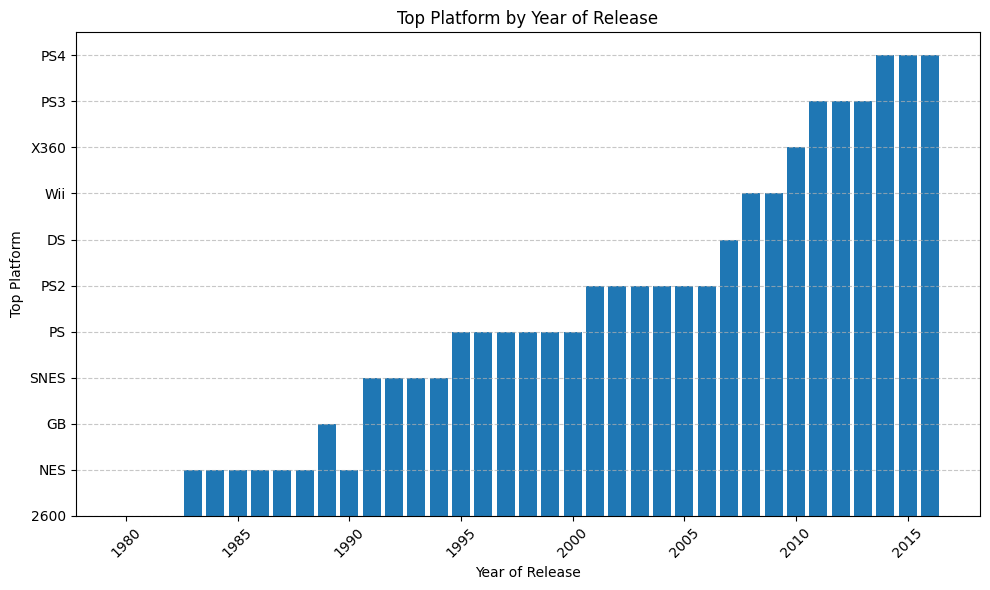

In [9]:
# Find the top platform by year of release
top_platform_by_release_year = game_sales_df.groupby('Year_of_Release')['Platform'].agg(lambda x: x.value_counts().index[0]).reset_index()

# Display the result
print(top_platform_by_release_year)

# Create a bar chart to visualize the top platform by year of release
plt.figure(figsize=(10, 6))
plt.bar(top_platform_by_release_year['Year_of_Release'], top_platform_by_release_year['Platform'])
plt.xlabel('Year of Release')
plt.ylabel('Top Platform')
plt.title('Top Platform by Year of Release')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("image/top_platform_by year_of_releases.png")
plt.show()

In [10]:
# Group the data by Platform and Year_of_Release, then count the number of releases for each platform in each year
platform_count_by_year = game_sales_df.groupby(['Platform', 'Year_of_Release']).size().reset_index(name='Release_Count')

# Sort the data by Year_of_Release in descending order
sorted_platforms = platform_count_by_year.sort_values(by='Year_of_Release', ascending=False)

# Get the top 10 platforms by Year_of_Release
top_10_platforms = sorted_platforms.head(10)

# Display the top 10 platforms by Year_of_Release
print(top_10_platforms)


    Platform  Year_of_Release  Release_Count
179     XOne           2016.0              9
9        3DS           2016.0              2
158     WiiU           2016.0              2
124      PS4           2016.0             17
178     XOne           2015.0             19
169     X360           2015.0              2
157     WiiU           2015.0              4
123      PS4           2015.0             26
120      PS3           2015.0              2
90        PC           2015.0              2


Platform
2600     23
3DS      48
DC        6
DS      139
GB       54
GBA      69
GC       46
GEN      12
N64      51
NES      74
PC       68
PS      204
PS2     320
PS3     238
PS4      78
PSP      56
PSV       7
SAT       3
SCD       1
SNES     48
Wii     152
WiiU     20
X360    233
XB       53
XOne     51
Name: Year_of_Release, dtype: int64


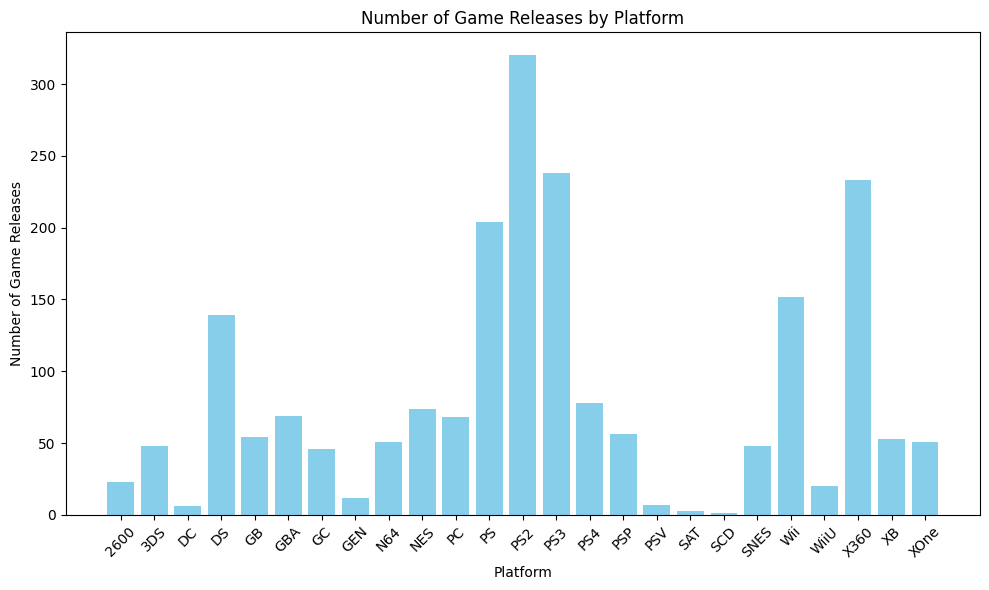

In [48]:
# Group the data by Platform and calculate the number of game releases for each platform
game_releases_by_platform = game_sales_df.groupby('Platform')['Year_of_Release'].count()

# Display the number of game releases for each platform
print(game_releases_by_platform)

# Create a bar chart to visualize the number of game releases by platform
plt.figure(figsize=(10, 6))
plt.bar(game_releases_by_platform.index, game_releases_by_platform.values, color='skyblue')

plt.xlabel('Platform')
plt.ylabel('Number of Game Releases')
plt.title('Number of Game Releases by Platform')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Platform
PS2     320
PS3     238
X360    233
PS      204
Wii     152
DS      139
PS4      78
NES      74
GBA      69
PC       68
PSP      56
GB       54
XB       53
XOne     51
N64      51
3DS      48
SNES     48
GC       46
2600     23
WiiU     20
GEN      12
PSV       7
DC        6
SAT       3
SCD       1
Name: Year_of_Release, dtype: int64


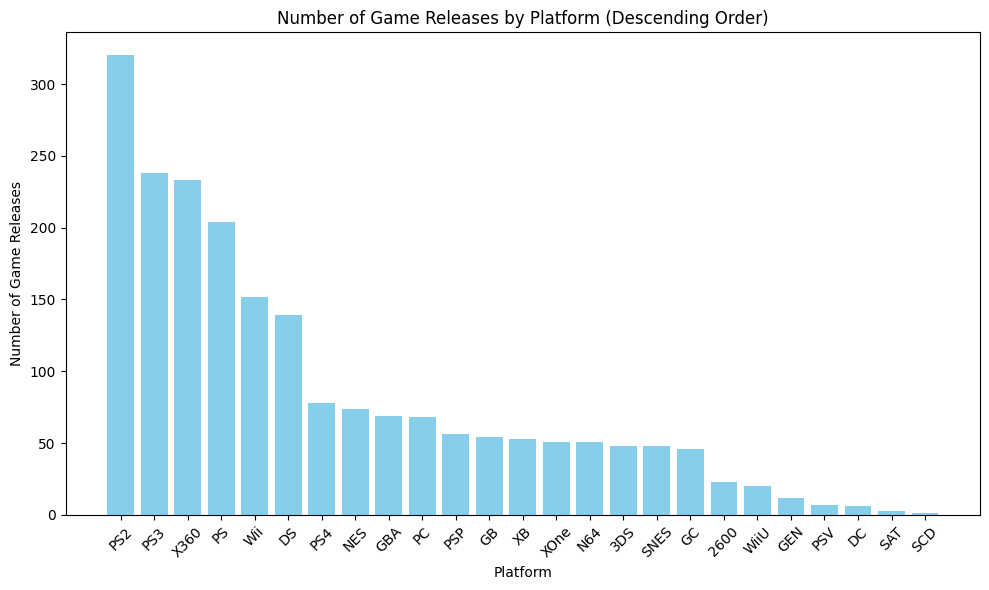

In [51]:
# Group the data by 'Platform' and calculate the number of game releases for each platform
game_releases_by_platform = game_sales_df.groupby('Platform')['Year_of_Release'].count()

# Sort the data in descending order
game_releases_by_platform = game_releases_by_platform.sort_values(ascending=False)

# Display the number of game releases for each platform
print(game_releases_by_platform)

# Create a bar chart to visualize the number of game releases by platform in descending order
plt.figure(figsize=(10, 6))
plt.bar(game_releases_by_platform.index, game_releases_by_platform.values, color='skyblue')

plt.xlabel('Platform')
plt.ylabel('Number of Game Releases')
plt.title('Number of Game Releases by Platform (Descending Order)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("image/number_of_game_releases_by_platform.png")
plt.show()

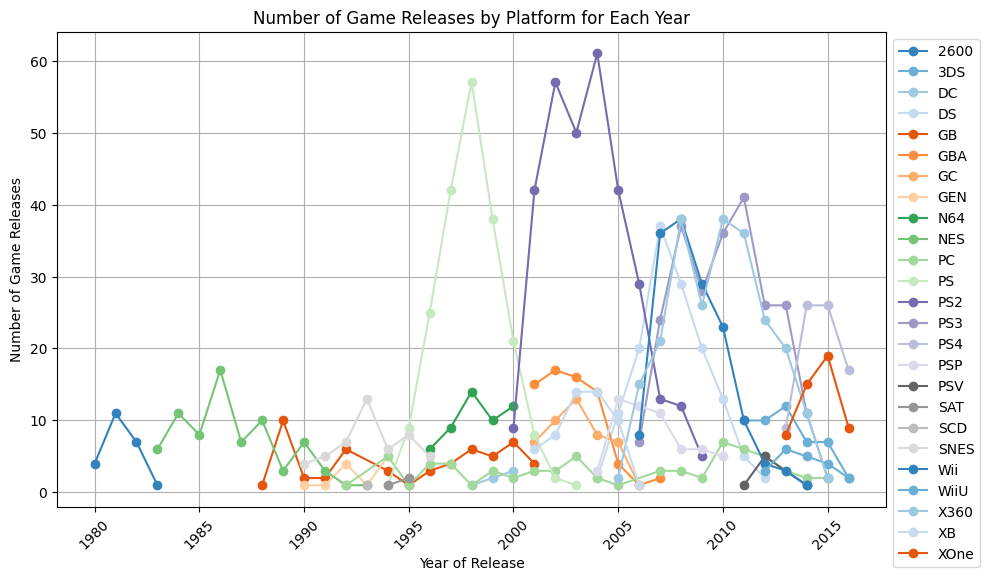

In [12]:
# Group the data by 'Platform' and 'Year_of_Release' and calculate the count of game releases in each group
game_release_by_platform_year = game_sales_df.groupby(['Platform', 'Year_of_Release']).size().reset_index(name='Num_Releases')

# Create a line graph to visualize the number of game releases by platform for each year with each different color
plt.figure(figsize=(10, 6))
platforms = game_release_by_platform_year['Platform'].unique()
num_colors = len(platforms)

colors = plt.cm.tab20c.colors  # Use the "tab20c" colormap

for i, platform in enumerate(platforms):
    platform_data = game_release_by_platform_year[game_release_by_platform_year['Platform'] == platform]
    color = colors[i % len(colors)]  # Ensure repeating colors if there are more than 20 platforms
    plt.plot(platform_data['Year_of_Release'], platform_data['Num_Releases'], marker='o', linestyle='-', color=color, label=platform)

plt.xlabel('Year of Release')
plt.ylabel('Number of Game Releases')
plt.title('Number of Game Releases by Platform for Each Year')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("image/number_of_game_releases_by_platform_for_each_year.png")
plt.show()

In [13]:
# Group the data by 'Platform' and 'Year_of_Release' and calculate the number of game releases in each group
game_releases_by_platform_year = game_sales_df.groupby(['Platform', 'Year_of_Release']).size().reset_index(name='Num_Releases')

# Group the data by 'Year_of_Release' and calculate the average number of game releases per platform for each year
average_releases_per_year = game_releases_by_platform_year.groupby('Year_of_Release')['Num_Releases'].mean().reset_index()

print(average_releases_per_year)

    Year_of_Release  Num_Releases
0            1980.0      4.000000
1            1981.0     11.000000
2            1982.0      7.000000
3            1983.0      3.500000
4            1984.0     11.000000
5            1985.0      8.000000
6            1986.0     17.000000
7            1987.0      7.000000
8            1988.0      5.500000
9            1989.0      6.500000
10           1990.0      3.500000
11           1991.0      2.750000
12           1992.0      3.800000
13           1993.0      4.000000
14           1994.0      3.500000
15           1995.0      4.200000
16           1996.0      8.600000
17           1997.0     14.750000
18           1998.0     15.800000
19           1999.0     11.600000
20           2000.0      9.000000
21           2001.0     12.142857
22           2002.0     16.166667
23           2003.0     16.500000
24           2004.0     14.857143
25           2005.0     11.250000
26           2006.0     10.444444
27           2007.0     18.375000
28           2

In [15]:
# Group the data by 'Platform' and calculate the total sales for each platform in each region
platform_sales_by_region = game_sales_df.groupby('Platform').agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum'
}).reset_index()

# Sort the data by total sales in each region in descending order
platform_sales_by_region.sort_values(by=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], ascending=False, inplace=True)

print(platform_sales_by_region)

   Platform  NA_Sales  EU_Sales  JP_Sales  Other_Sales
22     X360    417.18    193.09      5.93        60.28
12      PS2    382.59    218.71     58.13       129.99
20      Wii    315.19    204.36     49.73        57.49
13      PS3    255.29    235.74     34.32        95.39
11       PS    228.03    139.14     73.05        23.50
3        DS    181.50    142.43    105.21        38.16
9       NES    120.88     20.19     90.66         5.09
4        GB    114.32     47.82     70.69         8.20
5       GBA     88.61     38.60     27.42         5.34
8       N64     86.01     27.67     26.61         2.55
14      PS4     84.74    113.11      7.53        38.23
10       PC     71.34     72.33      0.17        10.88
24     XOne     67.53     36.73      0.27        10.37
23       XB     66.90     22.94      0.64         3.17
19     SNES     60.38     18.93     62.87         3.20
6        GC     56.69     18.72     16.64         2.78
1       3DS     55.56     43.39     62.88         9.24
0      260

   Platform  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Total_Sales
12      PS2    382.59    218.71     58.13       129.99       789.42
22     X360    417.18    193.09      5.93        60.28       676.48
20      Wii    315.19    204.36     49.73        57.49       626.77
13      PS3    255.29    235.74     34.32        95.39       620.74
3        DS    181.50    142.43    105.21        38.16       467.30
11       PS    228.03    139.14     73.05        23.50       463.72
14      PS4     84.74    113.11      7.53        38.23       243.61
4        GB    114.32     47.82     70.69         8.20       241.03
9       NES    120.88     20.19     90.66         5.09       236.82
1       3DS     55.56     43.39     62.88         9.24       171.07
5       GBA     88.61     38.60     27.42         5.34       159.97
10       PC     71.34     72.33      0.17        10.88       154.72
19     SNES     60.38     18.93     62.87         3.20       145.38
8       N64     86.01     27.67     26.61       

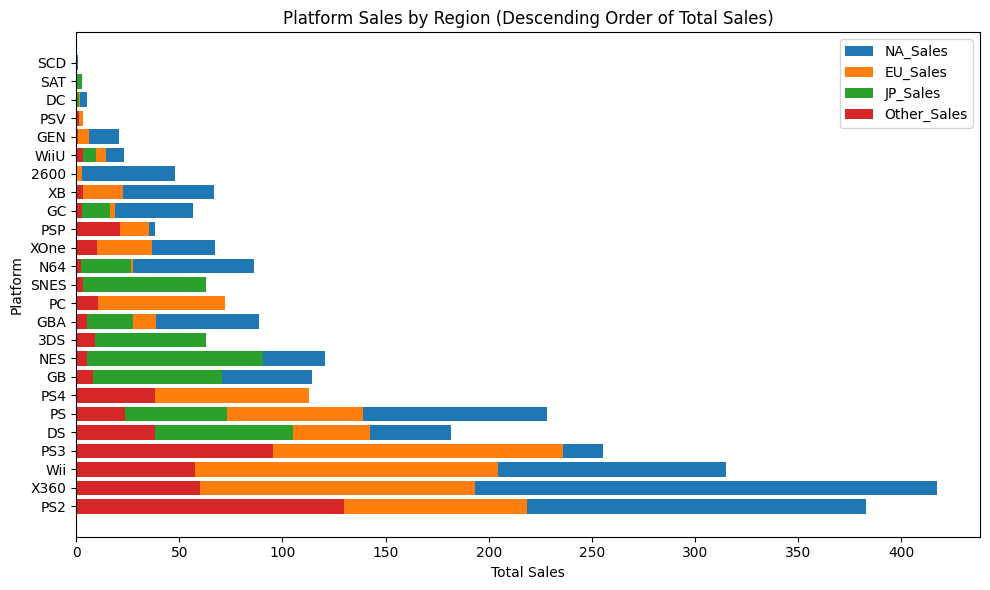

In [24]:
# Group the data by 'Platform' and calculate the total sales for each platform in each region
platform_sales_by_region = game_sales_df.groupby('Platform').agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum'
}).reset_index()

# Calculate the total sales across all regions for each platform
platform_sales_by_region['Total_Sales'] = platform_sales_by_region[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)

# Sort the data by total sales across all regions in descending order
platform_sales_by_region.sort_values(by='Total_Sales', ascending=False, inplace=True)

print(platform_sales_by_region)

# Create a horizontal bar chart to visualize the platform sales by region
plt.figure(figsize=(10, 6))

regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for i, region in enumerate(regions):
    plt.barh(platform_sales_by_region['Platform'], platform_sales_by_region[region], label=region)

plt.xlabel('Total Sales')
plt.ylabel('Platform')
plt.title('Platform Sales by Region (Descending Order of Total Sales)')
plt.legend()
plt.tight_layout()
plt.savefig("image/platform_sales_by_regions.png")
plt.show()

    Platform         Genre  Global_Sales
196     X360       Shooter        235.91
180      Wii        Sports        231.82
122      PS3        Action        205.05
111      PS2        Action        188.10
99        PS        Action         97.03
27        DS  Role-Playing         91.52
85       NES      Platform         88.83
38        GB  Role-Playing         82.69
139      PS4       Shooter         82.07
13       3DS  Role-Playing         67.66
163     SNES      Platform         61.77
215     XOne       Shooter         54.32
50       GBA  Role-Playing         54.11
96        PC    Simulation         39.47
206       XB       Shooter         32.80
73       N64      Platform         28.78
141      PSP        Action         28.43
6       2600       Shooter         19.23
184     WiiU      Platform         18.91
54        GC        Action         16.79
68       GEN      Platform         15.36
157      SAT      Fighting          3.00
151      PSV        Action          2.79
18        DC    

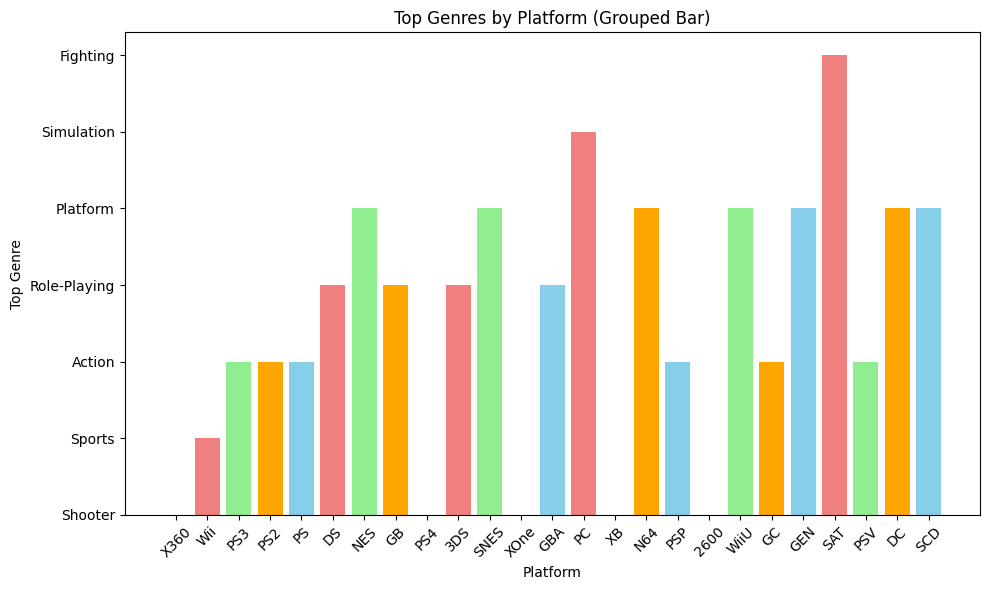

In [52]:
# Group the data by 'Platform' and 'Genre' and calculate the total sales for each genre within each platform
genre_sales_by_platform = game_sales_df.groupby(['Platform', 'Genre'])['Global_Sales'].sum().reset_index()

# Find the genre with the highest sales for each platform
top_genres_by_platform = genre_sales_by_platform.loc[genre_sales_by_platform.groupby('Platform')['Global_Sales'].idxmax()]

# Sort the data in descending order based on the total sales for each platform
top_genres_by_platform = top_genres_by_platform.sort_values(by='Global_Sales', ascending=False)

print(top_genres_by_platform)

# Create a grouped bar chart to visualize the top genres by platform
plt.figure(figsize=(10, 6))
plt.bar(top_genres_by_platform['Platform'], top_genres_by_platform['Genre'], color=['skyblue', 'lightcoral', 'lightgreen', 'orange'])

plt.xlabel('Platform')
plt.ylabel('Top Genre')
plt.title('Top Genres by Platform (Grouped Bar)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("image/top_Generes_by_platform.png")
plt.show()